In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


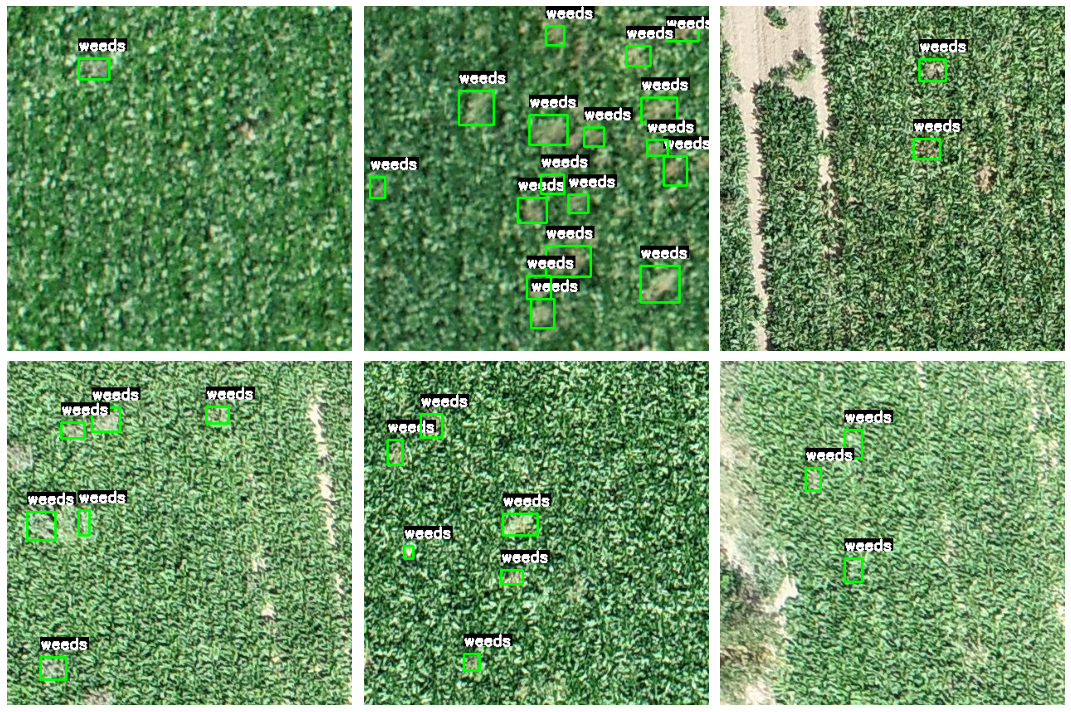

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='2_big_resolution',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.99 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=2_big_resolution, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

train: Scanning /home/user/CourseWork/Weed_UAV/train/labels.cache... 2872 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2872/2872 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/Weed_UAV/valid/labels.cache... 501 images, 1 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<?, ?it/s]


Plotting labels to YOLO11s/2_big_resolution/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11s/2_big_resolution
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      8.33G      2.577      3.011      1.691         85        640: 100%|██████████| 90/90 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        501       1180      0.142      0.205     0.0718     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      8.31G      2.333      2.145      1.529         61        640: 100%|██████████| 90/90 [00:16<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.509      0.486      0.465      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      8.14G      2.316      2.065      1.533         88        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.484      0.493      0.461      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80       8.1G      2.287      1.993      1.523         70        640: 100%|██████████| 90/90 [00:16<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.153      0.251      0.103      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      8.13G      2.289      2.006      1.526         88        640: 100%|██████████| 90/90 [00:16<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.481      0.491      0.418      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      8.14G      2.274      1.932      1.504         81        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        501       1180       0.47      0.436       0.41      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      8.09G      2.264      1.934       1.49         76        640: 100%|██████████| 90/90 [00:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180        0.4      0.417      0.347      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      8.08G      2.247      1.896      1.487         71        640: 100%|██████████| 90/90 [00:16<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        501       1180      0.558      0.537      0.512      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      8.09G      2.249      1.894      1.478         67        640: 100%|██████████| 90/90 [00:16<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.517      0.431      0.418      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      8.12G      2.242        1.9      1.481         67        640: 100%|██████████| 90/90 [00:16<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        501       1180      0.509      0.441      0.429      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80       8.1G      2.221      1.833      1.474         67        640: 100%|██████████| 90/90 [00:17<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all        501       1180      0.563      0.541      0.543      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      8.09G      2.227      1.829      1.478         80        640: 100%|██████████| 90/90 [00:16<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180      0.479      0.496      0.477      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      8.13G      2.217      1.823      1.478         84        640: 100%|██████████| 90/90 [00:20<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        501       1180      0.605      0.476      0.519      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      8.09G      2.218      1.806      1.469         99        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.566      0.553      0.543      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      8.14G      2.218      1.784      1.468         82        640: 100%|██████████| 90/90 [00:16<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180      0.619      0.517      0.547      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      8.09G      2.204      1.822       1.46         61        640: 100%|██████████| 90/90 [00:19<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        501       1180      0.555      0.536      0.531      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      8.05G      2.213      1.782       1.46         98        640: 100%|██████████| 90/90 [00:16<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        501       1180      0.595      0.544      0.555        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      8.08G      2.207      1.781      1.474         96        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.599      0.493      0.537      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      8.09G      2.202      1.788      1.455         74        640: 100%|██████████| 90/90 [00:15<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.618      0.533      0.557      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      8.13G       2.19      1.774       1.46         82        640: 100%|██████████| 90/90 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        501       1180      0.593      0.523      0.544      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      8.09G      2.194      1.758      1.451         96        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180       0.61       0.55       0.56      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      8.07G      2.197      1.746      1.463         68        640: 100%|██████████| 90/90 [00:16<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.574      0.525      0.536      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      8.08G        2.2      1.735      1.453         91        640: 100%|██████████| 90/90 [00:16<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        501       1180      0.612      0.552      0.565      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      8.08G      2.189      1.774      1.437         82        640: 100%|██████████| 90/90 [00:16<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.586      0.525      0.541      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      8.09G      2.176      1.722      1.435        112        640: 100%|██████████| 90/90 [00:16<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.643      0.519      0.565       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      8.12G      2.194      1.717      1.435         63        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180      0.599      0.475      0.523        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      8.08G      2.171      1.719      1.435         97        640: 100%|██████████| 90/90 [00:16<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        501       1180      0.611      0.541       0.56      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      8.15G      2.163      1.697      1.448         92        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        501       1180      0.611      0.542      0.558        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      8.13G      2.173      1.695      1.434         76        640: 100%|██████████| 90/90 [00:16<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        501       1180      0.611        0.5      0.546      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      8.09G       2.16      1.717      1.428         79        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        501       1180      0.615      0.531      0.544      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      8.13G      2.154      1.674      1.432         59        640: 100%|██████████| 90/90 [00:19<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.625      0.508      0.558      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      8.09G      2.162      1.705      1.437         74        640: 100%|██████████| 90/90 [00:19<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.596      0.544      0.562      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      8.08G      2.164       1.68      1.434         83        640: 100%|██████████| 90/90 [00:19<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.623      0.568      0.591      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      8.13G      2.144      1.666      1.426         56        640: 100%|██████████| 90/90 [00:19<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        501       1180      0.621      0.571      0.583      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      8.09G      2.147       1.65      1.433         78        640: 100%|██████████| 90/90 [00:19<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        501       1180      0.614      0.563      0.573      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      8.08G      2.146      1.622      1.424         74        640: 100%|██████████| 90/90 [00:18<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        501       1180      0.661      0.511      0.563      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      8.07G      2.168      1.666      1.435         69        640: 100%|██████████| 90/90 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.643      0.525      0.562      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      8.09G      2.151      1.643       1.43         73        640: 100%|██████████| 90/90 [00:19<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        501       1180      0.625      0.574      0.589      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      8.09G      2.146      1.632      1.412         88        640: 100%|██████████| 90/90 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.609      0.563      0.579      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      8.08G      2.138      1.629       1.41         53        640: 100%|██████████| 90/90 [00:19<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]

                   all        501       1180      0.606      0.559      0.572      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      8.08G      2.132      1.622      1.419         64        640: 100%|██████████| 90/90 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180        0.6      0.588      0.586      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      8.09G      2.143      1.623      1.433         61        640: 100%|██████████| 90/90 [00:19<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        501       1180      0.628      0.608      0.613      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      8.09G      2.122      1.624      1.406         77        640: 100%|██████████| 90/90 [00:19<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        501       1180      0.628      0.577       0.59      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80       8.1G      2.132      1.626      1.428         70        640: 100%|██████████| 90/90 [00:21<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        501       1180      0.621      0.574      0.587      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      8.09G      2.121      1.604      1.413         79        640: 100%|██████████| 90/90 [00:19<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180      0.657      0.546      0.586      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      8.09G      2.134      1.615      1.413         84        640: 100%|██████████| 90/90 [00:16<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        501       1180      0.628      0.578      0.592      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      8.13G      2.129      1.593      1.405         82        640: 100%|██████████| 90/90 [00:21<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all        501       1180      0.642       0.56      0.587      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      8.09G      2.122      1.591      1.404         51        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        501       1180      0.636      0.579      0.598      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      8.12G      2.112      1.561      1.419         62        640: 100%|██████████| 90/90 [00:19<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.643       0.57      0.592      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      8.08G      2.108      1.565      1.406         87        640: 100%|██████████| 90/90 [00:16<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180      0.643      0.576      0.596      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80       8.1G      2.119      1.587      1.401         62        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.608      0.592      0.595      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      8.08G      2.087      1.557       1.39        116        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.618      0.595      0.595      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      8.13G        2.1      1.561      1.391         49        640: 100%|██████████| 90/90 [00:16<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180      0.636      0.576      0.586      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      8.14G       2.11      1.548      1.391         72        640: 100%|██████████| 90/90 [00:16<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all        501       1180      0.624      0.595      0.597      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      8.09G      2.114      1.558      1.403        114        640: 100%|██████████| 90/90 [00:16<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        501       1180      0.625      0.573      0.593      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      8.08G      2.088      1.557        1.4         61        640: 100%|██████████| 90/90 [00:16<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180       0.63      0.582      0.593      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80       8.1G      2.103      1.549       1.39         61        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        501       1180      0.596        0.6      0.595      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      8.09G      2.081      1.528      1.388        104        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]

                   all        501       1180      0.663      0.579       0.61      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      8.09G      2.089      1.542      1.393         83        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]

                   all        501       1180      0.629      0.599      0.619      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      8.09G      2.089      1.519      1.383         77        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180       0.64      0.581      0.607      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      8.09G      2.079      1.513      1.391         93        640: 100%|██████████| 90/90 [00:16<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180      0.607      0.606      0.603      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      8.09G       2.08      1.527      1.378         96        640: 100%|██████████| 90/90 [00:16<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.622      0.603      0.607      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      8.14G      2.066      1.514      1.384         63        640: 100%|██████████| 90/90 [00:16<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180      0.623      0.605      0.612       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      8.09G      2.052      1.503      1.386         76        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.634      0.599      0.611      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      8.13G      2.074      1.531      1.381         93        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]

                   all        501       1180      0.594      0.602      0.596      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      8.09G       2.07      1.482       1.39         71        640: 100%|██████████| 90/90 [00:16<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        501       1180      0.628      0.589      0.605      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      8.13G      2.082      1.499      1.392         66        640: 100%|██████████| 90/90 [00:16<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        501       1180      0.629      0.593      0.604      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      8.12G      2.048      1.479      1.374         86        640: 100%|██████████| 90/90 [00:16<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        501       1180      0.647      0.592      0.614      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      8.13G      2.075       1.48       1.39         92        640: 100%|██████████| 90/90 [00:22<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        501       1180      0.625      0.604       0.61      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      8.08G      2.048      1.496      1.379         84        640: 100%|██████████| 90/90 [00:16<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all        501       1180      0.648      0.594      0.607      0.213


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      8.08G      2.092      1.514      1.473         81        640: 100%|██████████| 90/90 [00:16<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        501       1180      0.643      0.597       0.61      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      8.09G      2.062      1.512       1.46         69        640: 100%|██████████| 90/90 [00:15<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        501       1180      0.663      0.576      0.601      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      8.04G      2.051      1.465       1.45         49        640: 100%|██████████| 90/90 [00:16<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.658      0.586      0.614      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      8.09G      2.045       1.46      1.443         76        640: 100%|██████████| 90/90 [00:15<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180      0.645      0.582      0.605       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      8.08G      2.043      1.445      1.457         61        640: 100%|██████████| 90/90 [00:15<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180      0.661      0.576      0.617      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      8.07G      2.038      1.455      1.456         60        640: 100%|██████████| 90/90 [00:16<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180       0.66      0.586      0.611      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      8.04G      2.028      1.435      1.436         44        640: 100%|██████████| 90/90 [00:16<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.634      0.608      0.619      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      8.07G      2.033      1.432      1.443         38        640: 100%|██████████| 90/90 [00:16<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        501       1180      0.634      0.585      0.611      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      8.08G      2.035      1.424      1.443         76        640: 100%|██████████| 90/90 [00:16<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        501       1180      0.627      0.607      0.615      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      8.08G       2.03      1.438      1.444         46        640: 100%|██████████| 90/90 [00:15<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        501       1180      0.649      0.596      0.618      0.223



80 epochs completed in 0.458 hours.
Optimizer stripped from YOLO11s/2_big_resolution/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/2_big_resolution/weights/best.pt, 19.2MB

Validating YOLO11s/2_big_resolution/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]


                   all        501       1180      0.632      0.608      0.619      0.225
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to YOLO11s/2_big_resolution


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd120b7f130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO11s/2_big_resolution/results.csv')

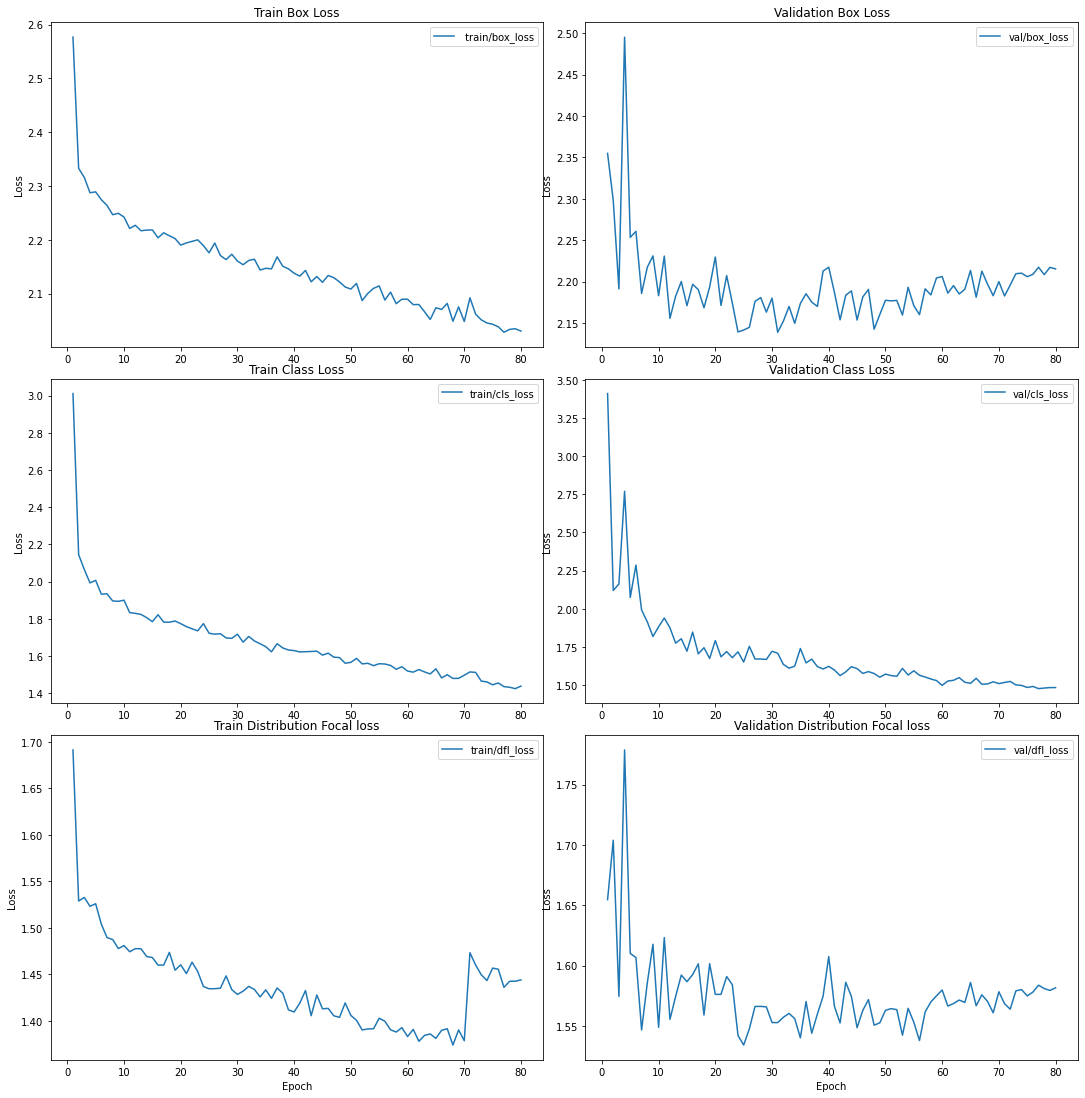

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

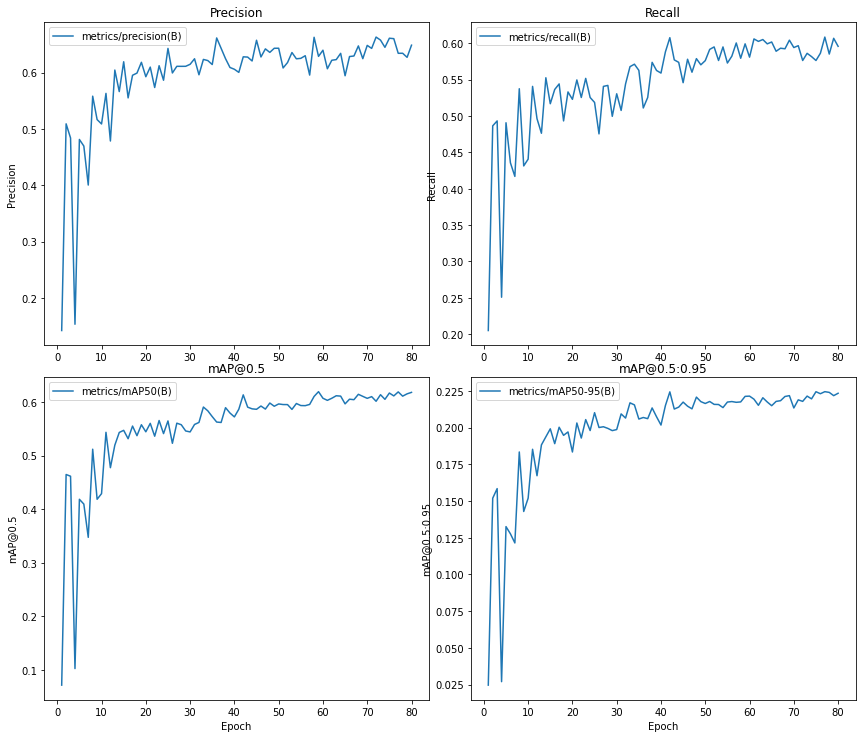

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

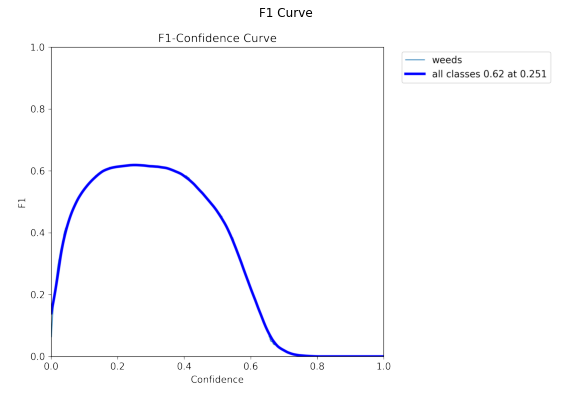

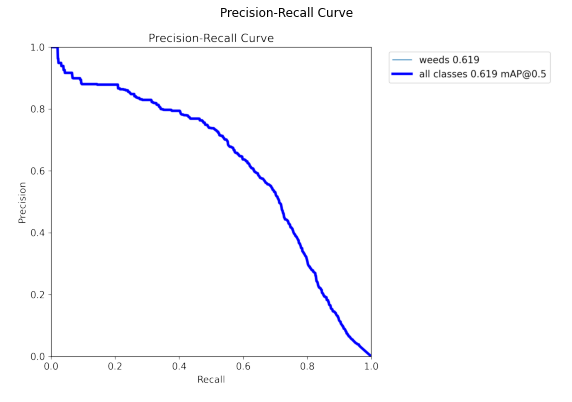

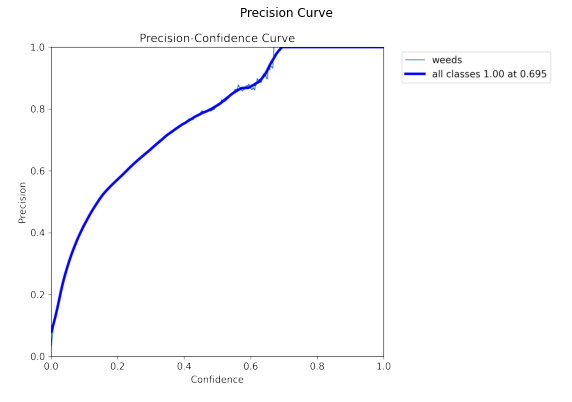

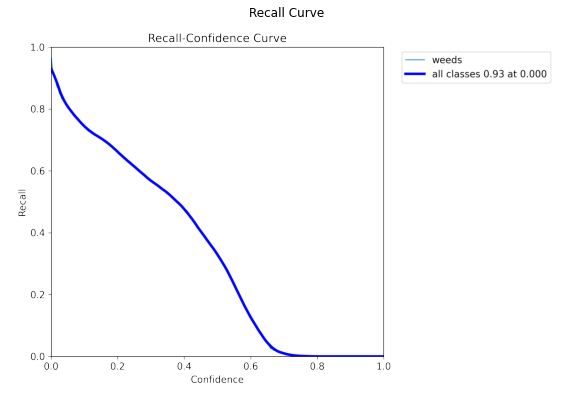

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11s/2_big_resolution/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11s/2_big_resolution/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11s/2_big_resolution/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11s/2_big_resolution/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

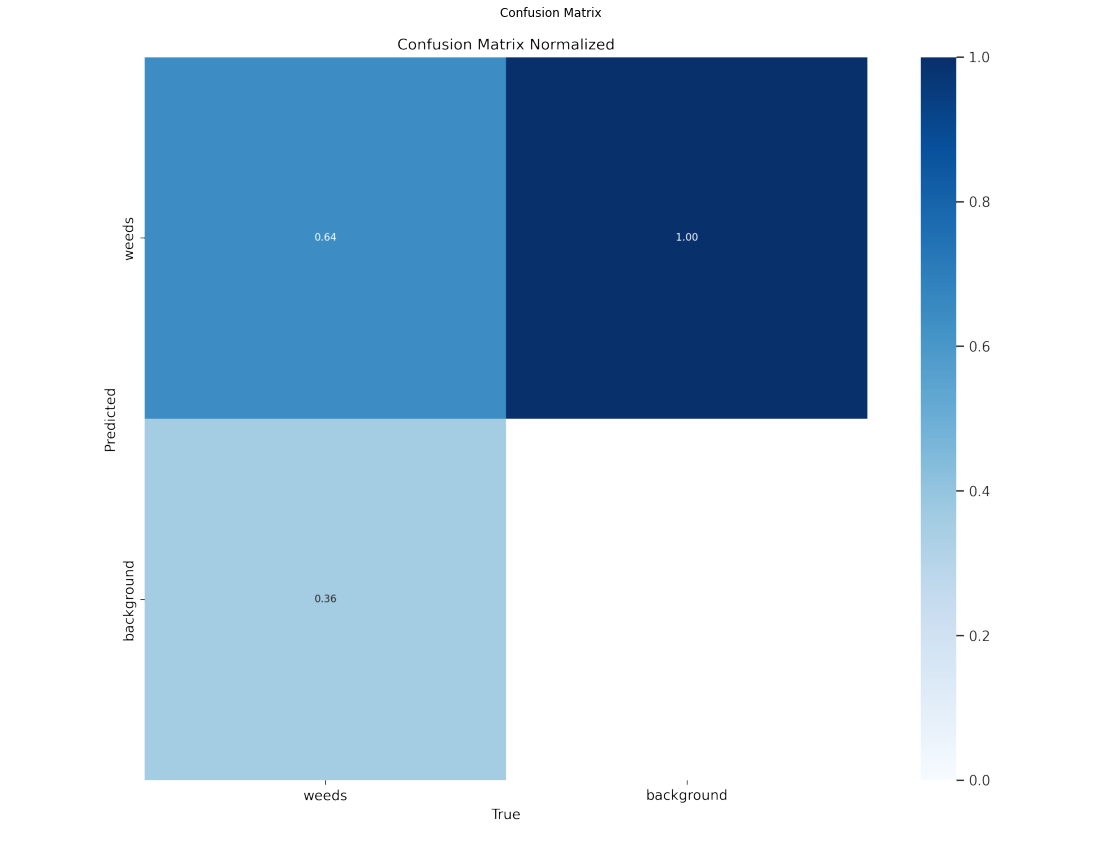

In [10]:
confusion_matrix = Image.open("YOLO11s/2_big_resolution/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/Weed_UAV/test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg: 640x640 1 weeds, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


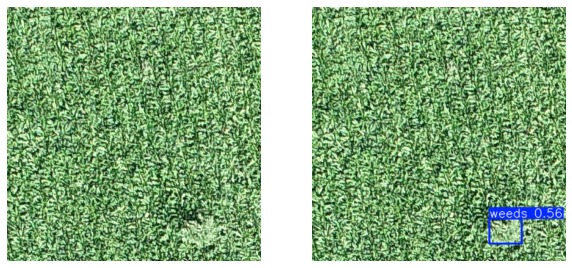

In [11]:
res = model('test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();